# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


много пропусков в высоте потолков, апартаментах и балконах. Слишком длинные значения в цене квартир

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


странное максимальное значение высоты потолков в 100м, минимальная и максимальная стоимость квартир вызывает вопросы и жилая площадь в 409 кв.м

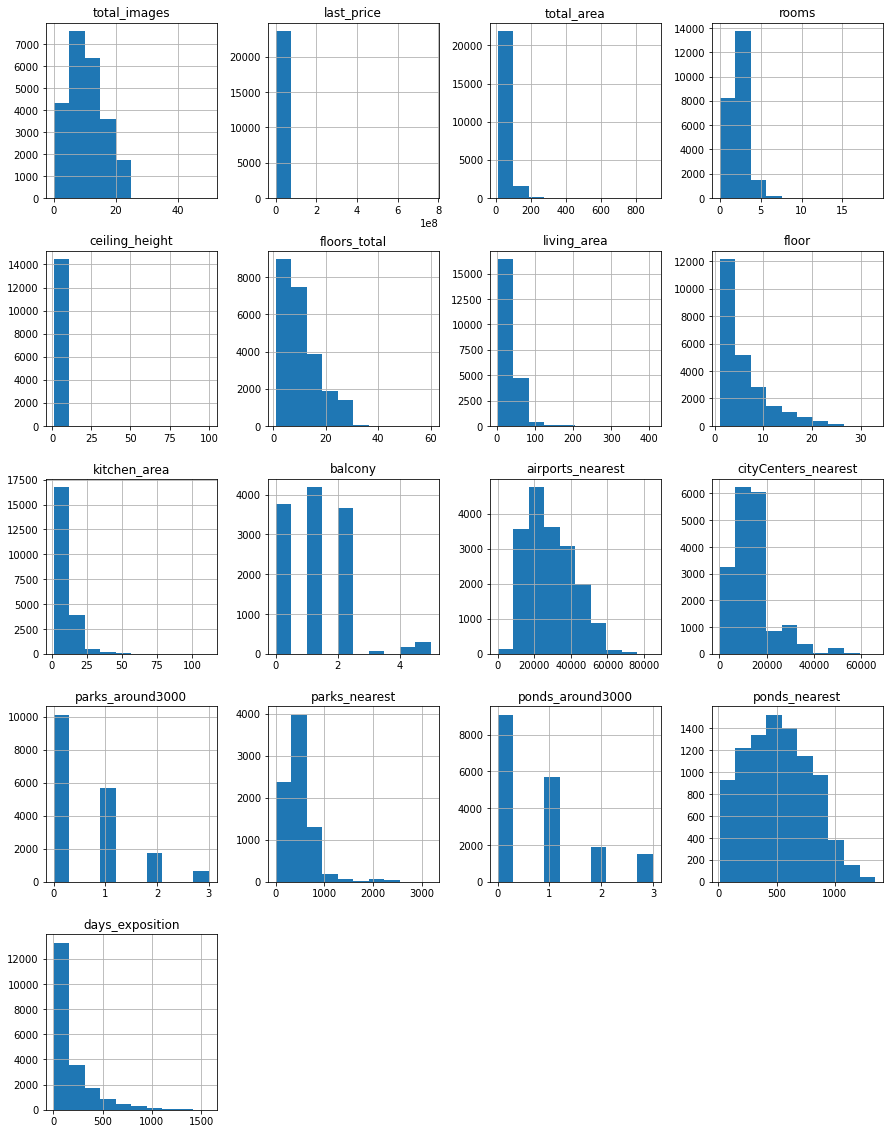

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

2.1 Находим в каких строках есть пропуски

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

   balcony - нули в балконах скорее всего означают отсутствие балкона
   
   parks_around3000, ponds_around300, ponds_nearest и parks_nearest - пропуски могут быть результатом ошибки в выгрузке данных, но это не самые важные параметры и логично их не трогать
   
   days_exposition -  важный параметр, но его нельзя заполнить средней или медианой. Оставляю пропуски как есть. сами пропуски, возможно появились потому, что объявление забыли снять, например
   
   is_apartment имеет много Nan, можно предположить что это означает что квартира не является апартаментами. Не все знают разницу и возможно, данные о том что это апартаменты, проставили только те, кто является их владельцем
   

2.2 Проверим наличие дубликатов

In [7]:
data.duplicated().sum()

0

2.3 Заполним пропуски там, где это возможно

In [8]:
#floors_total(всего этажей) может быть заполнена медианным значением
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [9]:
#ceiling_height(высота потолков) может быть заполнена медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
#balcony(балкон) - предполагаю, что пропуски означают отсутствие балкона и заменю все пропуски на 0
data['balcony'] = data['balcony'].fillna(value = '0')

In [11]:
#is_apartment можно предпложить, что пропуск означает что это не апартаменты и можно заполнить 0
data['is_apartment'] = data['is_apartment'].fillna(value = '0')

In [12]:
#living_area(жилая площадь квартиры) - важный показатель, нужно заполнить медианным значением по каждой категории квартир
for l in data['rooms'].unique():
    data.loc[(data['rooms'] == l) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[(data['rooms'] == l), 'living_area'].median()

In [13]:
#kitchen_area(площадь кухни) - важный показатель, нужно заполнить медианным значением по каждой категории квартир
for kitchen in data['rooms'].unique():
    data.loc[(data['rooms'] == kitchen) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[(data['rooms'] == kitchen) & (data['rooms'] != 0), 'kitchen_area'].median()

In [14]:
#в названиях населенных пунктов 49 пропусков, это малая часть данных и их можно удалить, т.к. восстановить их названия не получится
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [15]:
#смотрим еще раз что с пропусками
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

2.4 Поменяем типы данных в столбцах

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23453 non-null  float64
 13  balcony               23650 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,0,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,0,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменим данные в:
  first_day_exposition в формат datetime
  
  floors_total, balcony - переводим в целочисленный формат
  airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - здесь есть пропуски и Nan. которые решили не заменять, поэтому решено не переводить в целочисленный формат
  

In [18]:
# меняем first_day_exposition в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
#переводим строки в целочисленный формат и округлим до одного знака после запятой
data = data.astype({'floors_total' : 'int', 'balcony': 'int'})
data['ceiling_height'] = data['ceiling_height'].round(1)

In [20]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,45.0,9,0,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Наведем в порядок в названиях населенных пунктов оставив только названия

In [21]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('городской поселок', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('посёлок', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('поселок', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('деревня', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('пок', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('коттеджный', '').str.lstrip()
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '').str.lstrip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'городской  Янино-1', 'Парголово',
       'Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'Кудрово', 'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'село Павлово', 'Оредеж', 'село Копорье', 'Молодёжное', 'Тихвин',
       'Победа', 'Нурма', 'Синявино', 'Тосно', '

Убираем аномальные значения высоты потолков

In [22]:
data.query('ceiling_height < 100 & ceiling_height > 2').shape[0] / data.shape[0]

0.9993657505285413

In [23]:
data = data.query('ceiling_height < 100 & ceiling_height > 2')#в описаннии выше видели что есть странные выбросы в виде
#потолка меньше 2 метров или потолка в 100м

In [24]:
#уберем значения-опечатки
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /10

In [25]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,45.0,9,0,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Добавим в таблицу новые столбцы

In [26]:
data['m_2_price'] = (data['last_price']/ data['total_area']).round(2) #столбец 'цена 1 кв.м'

In [27]:
data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())# столбец 'день'
dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
data['day'] = data['day'].map(dict_of_weekdays)

In [28]:
data['month'] =data['first_day_exposition'].apply(lambda x: x.month) #столбец 'месяц'

In [29]:
data['year'] =data['first_day_exposition'].apply(lambda x: x.year) #столбец 'год'

In [30]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(2) #столбец 'расстояние до центра города в км'

In [31]:
data['last_price_thousand'] = data['last_price'] / 1000 #делаем в тысячах для удобства восприятия

In [32]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_2_price,day,month,year,cityCenters_nearest_km,last_price_thousand
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,четверг,3,2019,16.03,13000.0
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,вторник,12,2018,18.60,3350.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,четверг,8,2015,13.93,5196.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,45.0,9,0,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,пятница,7,2015,6.80,64900.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,вторник,6,2018,8.10,10000.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23635 entries, 0 to 23649
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23635 non-null  int64         
 1   last_price              23635 non-null  float64       
 2   total_area              23635 non-null  float64       
 3   first_day_exposition    23635 non-null  datetime64[ns]
 4   rooms                   23635 non-null  int64         
 5   ceiling_height          23634 non-null  float64       
 6   floors_total            23635 non-null  int64         
 7   living_area             23635 non-null  float64       
 8   floor                   23635 non-null  int64         
 9   is_apartment            23635 non-null  object        
 10  studio                  23635 non-null  bool          
 11  open_plan               23635 non-null  bool          
 12  kitchen_area            23438 non-null  float6

In [34]:
#добавим тип этажей
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [35]:
data['floor_type'] = data.apply(floor_status, axis=1)

In [36]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_2_price,day,month,year,cityCenters_nearest_km,last_price_thousand,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,четверг,3,2019,16.03,13000.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,вторник,12,2018,18.60,3350.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,четверг,8,2015,13.93,5196.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,45.0,9,0,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,пятница,7,2015,6.80,64900.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,вторник,6,2018,8.10,10000.0,другой


### Исследовательский анализ данных

In [37]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price_thousand', 'rooms', 'ceiling_height',
    'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 
    'day', 'month']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23635.0,60.338835,35.668939,12.00,40.00,52.00,69.745,900.0
living_area,23635.0,34.318287,21.711590,2.00,18.40,30.30,42.700,409.7
kitchen_area,23438.0,10.462903,5.662688,1.30,7.30,9.04,11.500,112.0
last_price_thousand,23635.0,6542.605548,10899.254106,12.19,3402.50,4650.00,6799.000,763000.0
rooms,23635.0,2.070362,1.078732,0.00,1.00,2.00,3.000,19.0
ceiling_height,23634.0,2.682039,0.253376,2.20,2.60,2.60,2.700,14.0
floor,23635.0,5.893632,4.884191,1.00,2.00,4.00,8.000,33.0
floors_total,23635.0,10.670108,6.582101,1.00,5.00,9.00,16.000,60.0
cityCenters_nearest,18133.0,14197.631445,8607.338170,181.00,9241.00,13105.00,16293.000,65968.0
airports_nearest,18110.0,28802.586251,12638.776092,0.00,18574.25,26755.50,37294.000,84869.0


Видим, что 2й квартиль и среднее не имеют особых отличий, значит выбросов данных не много и с ними можно работать

(0.0, 400.0)

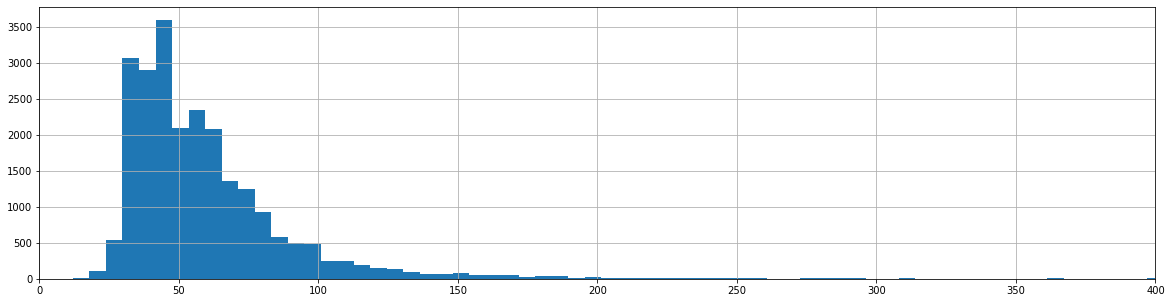

In [38]:
data['total_area'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 400)

основная масса квартир имеет площадь от 25 до 100 кв м.

(0.0, 200.0)

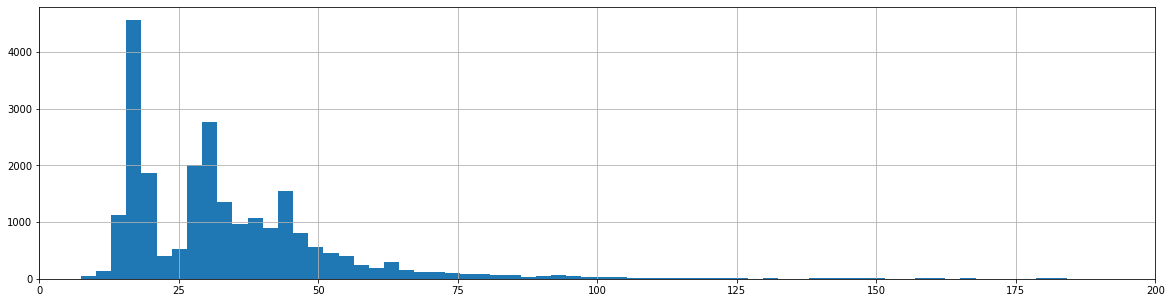

In [39]:
data['living_area'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 200)

очень много квартир с жилой площадью в районе 20 кв.м, так же достаточно большой пласт недвижимости в районе 28-60 жилых метров

(0.0, 70.0)

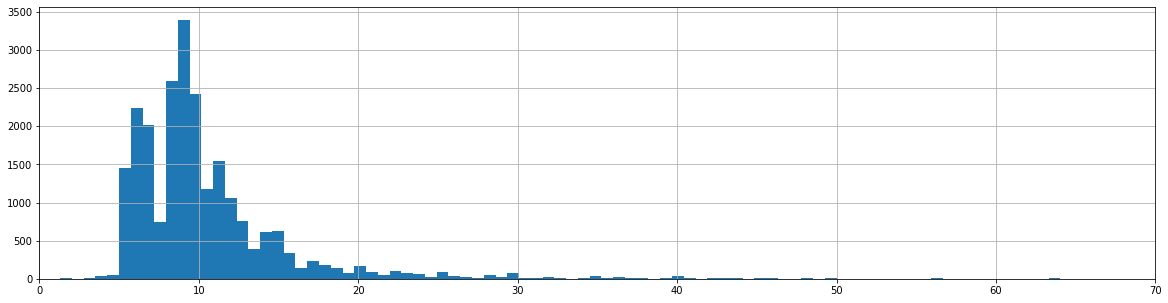

In [40]:
data['kitchen_area'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 70)

Основная масса квартир имеет площадь кухни от 5 до 15 кв.м.

(0.0, 100000.0)

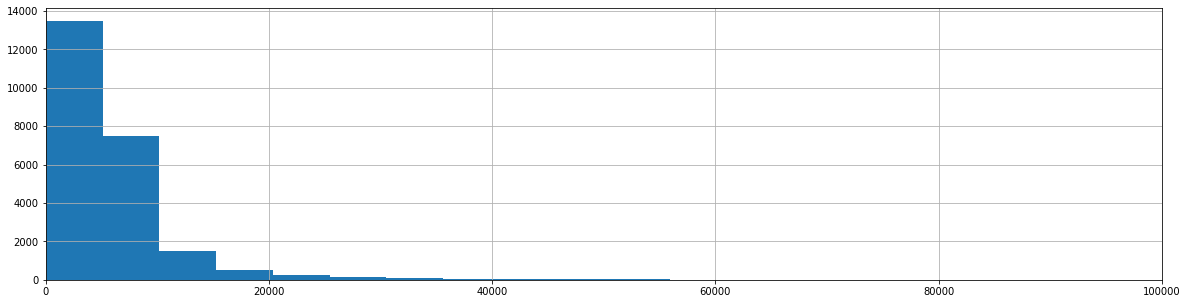

In [41]:
data['last_price_thousand'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 10e4)

основная масса квартир находится в ценовом диапазоне до 10 млн

(0.0, 10.0)

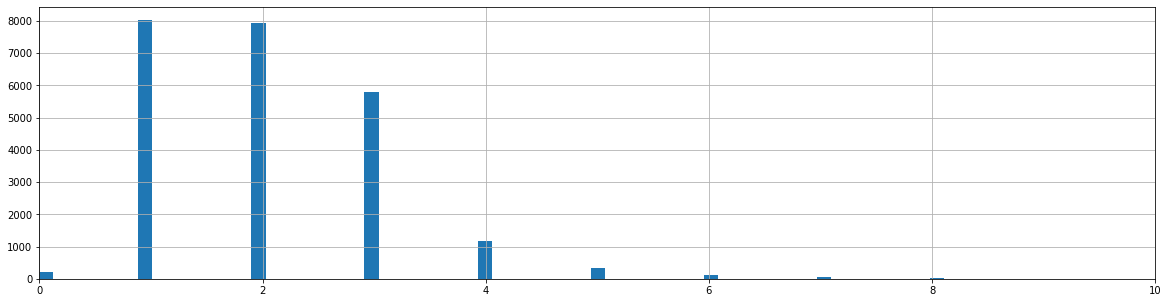

In [42]:
data['rooms'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 10)

Наибольшее количество предложений 1-2 комнатных квартир, немного меньше на рынке квартир 3хкомнатных. В дальнейшем увеличение количества комнат скорее эксклюзив

(2.0, 5.0)

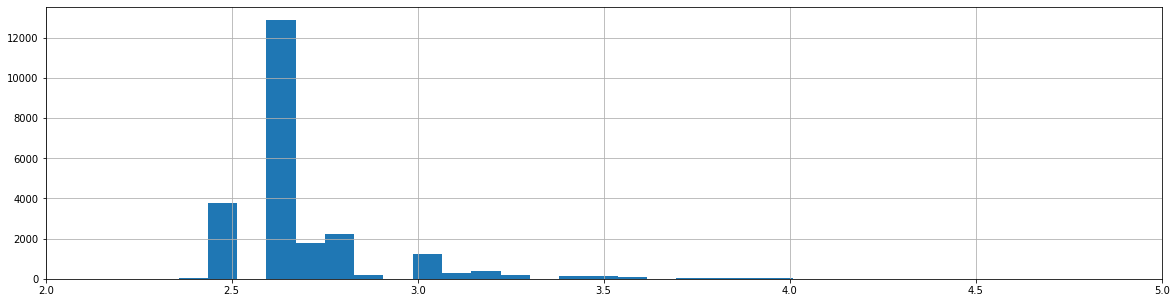

In [43]:
data['ceiling_height'].hist(bins=150, figsize=(20, 5));
plt.xlim(2, 5)

Высота потолков варьируется от 2,5 до 3,2. Преобладает высота потолков в районе 2,7

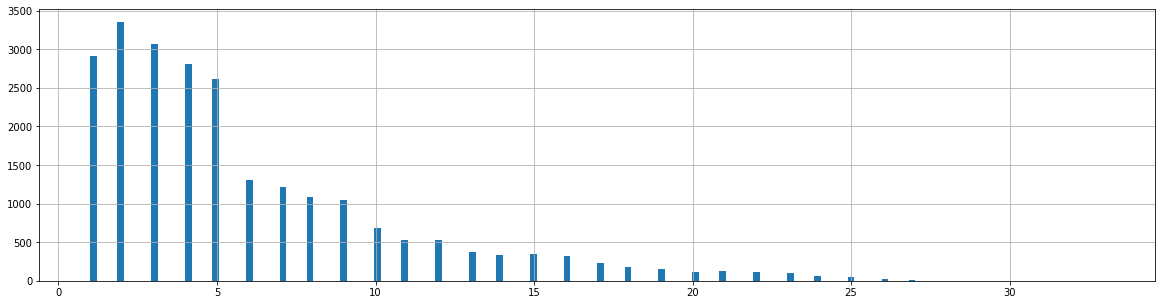

In [44]:
data['floor'].hist(bins=150, figsize=(20, 5));

наибольшее количество квартир находится до 10 этажа. Самое большое количество объявлений о продаже квартир на 2м этаже
после 10го этажа количество объявлений идет на спад, все то, что выше 25 этажа можно считать эксклюзивными предложениями

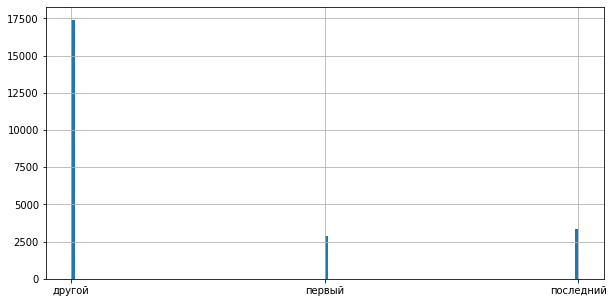

In [45]:
data['floor_type'].hist(bins=150, figsize=(10, 5));

Наимееньшее количество квартир продается на 1м и последнем этажах. На рынке преобладают объявления с этажностью категории "другой"

(0.0, 40.0)

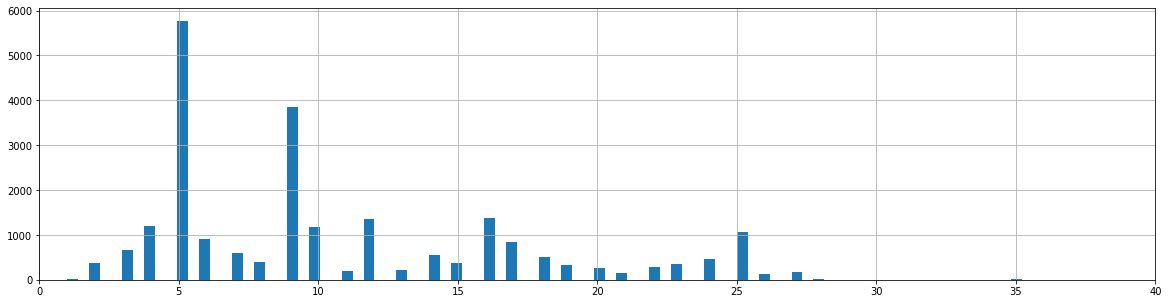

In [46]:
data['floors_total'].hist(bins=150, figsize=(20, 5));
plt.xlim(0, 40)

самые распространенные дома - 5 и 9 этажные

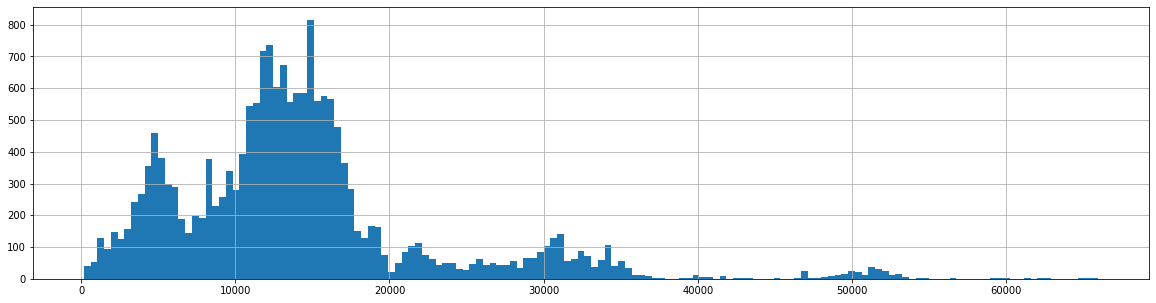

In [47]:
data['cityCenters_nearest'].hist(bins=150, figsize=(20, 5));

наибольшее количество недвижимости находится в радиусе 18 км

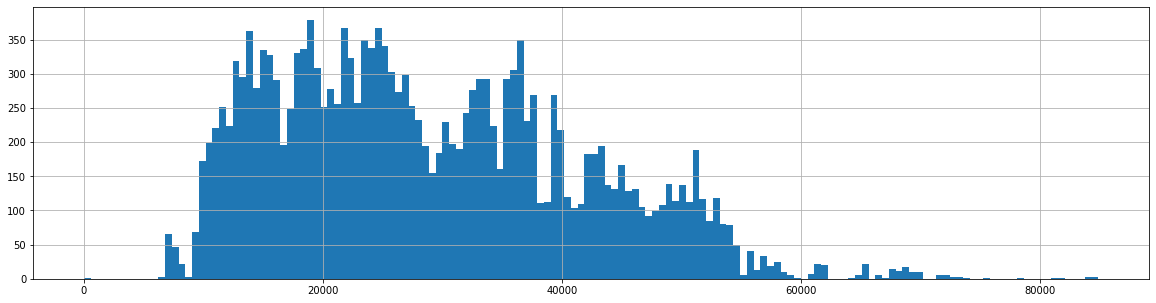

In [48]:
data['airports_nearest'].hist(bins=150, figsize=(20, 5));

расстояние до аэропорта варьируется от 10 до 55 км

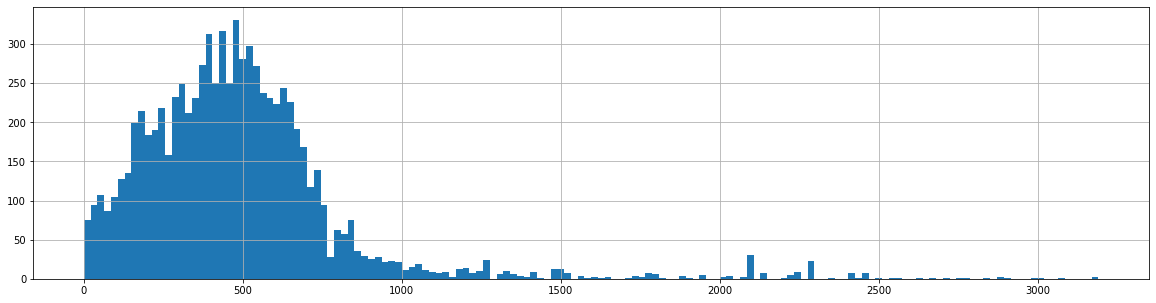

In [49]:
data['parks_nearest'].hist(bins=150, figsize=(20, 5));

по имеющимся данным расстояние до ближайшего парка – в основном не больше, чем 750 м 

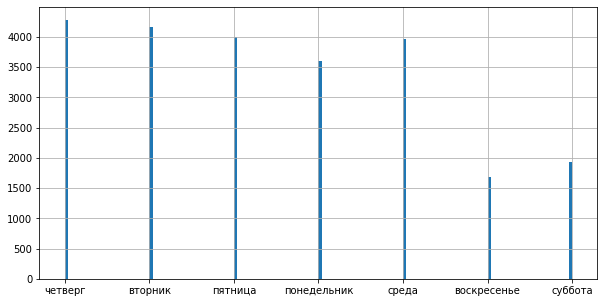

In [50]:
data['day'].hist(bins=150, figsize=(10, 5));

в будни количество объявлений размещается гораздо больше, чем в выходные дни

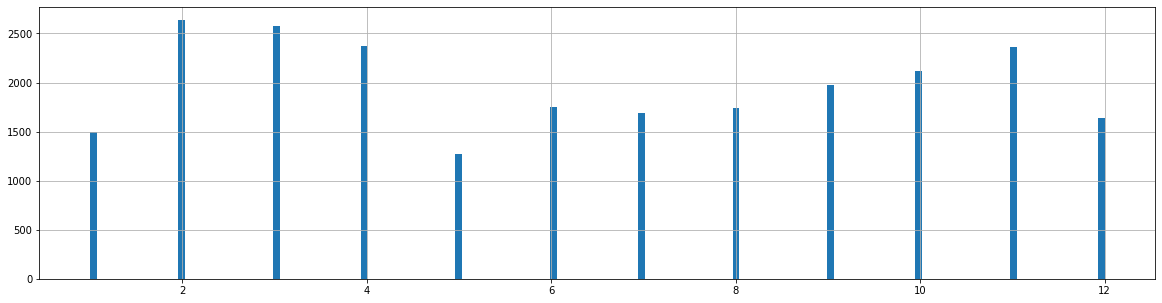

In [51]:
data['month'].hist(bins=150, figsize=(20, 5));

данный график подтверждает сезонность: летом и в новогодние праздники количество объявлений снижается. Пик публикаций приходится на начало года с февраля по апрель

посмотрим данные о времени продажи квартир

In [52]:
data['days_exposition'].describe()

count    20458.000000
mean       180.800323
std        219.820575
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средняя в 2 раза больше медианы, значит у нас есть большие значения, которые влияют на среднее. 
Есть квартиры, которые продавались 1580 дней, но большая часть квартир продавалась первые 100 дней. Большие значения появились скорее всего из-за того, что некоторые объявления забыли снимать с продажи, либо (едничные квартиры) реально столько продавались

<AxesSubplot:>

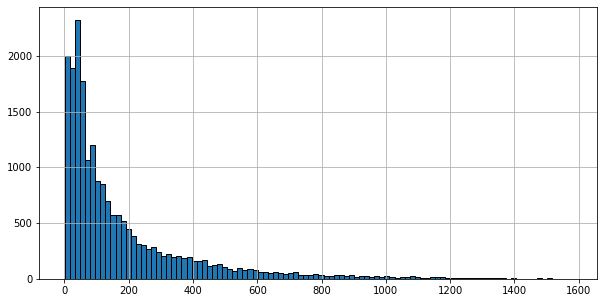

In [53]:
data['days_exposition'].hist(bins=100, figsize=(10,5), ec='black')

<AxesSubplot:>

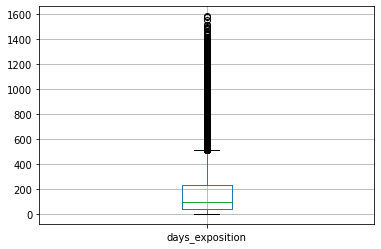

In [54]:
data.boxplot(column='days_exposition')

посмотрим график ближе, в пределах усов:

<AxesSubplot:>

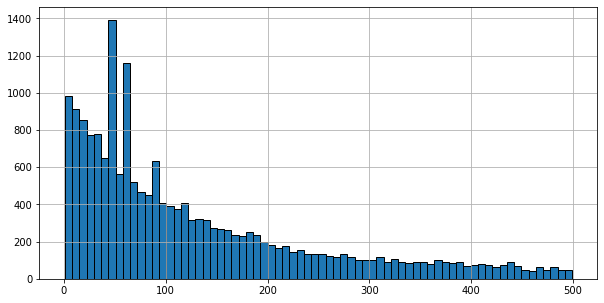

In [55]:
data.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

большое количество закрытий объявлений в период 40-60 и 80 дней. Возможно это связано как-то с автоматическим продлением и закрытием объявлений. Но этот момент нужно уточнять у разработчиков

отфильтруем выбросы из данных

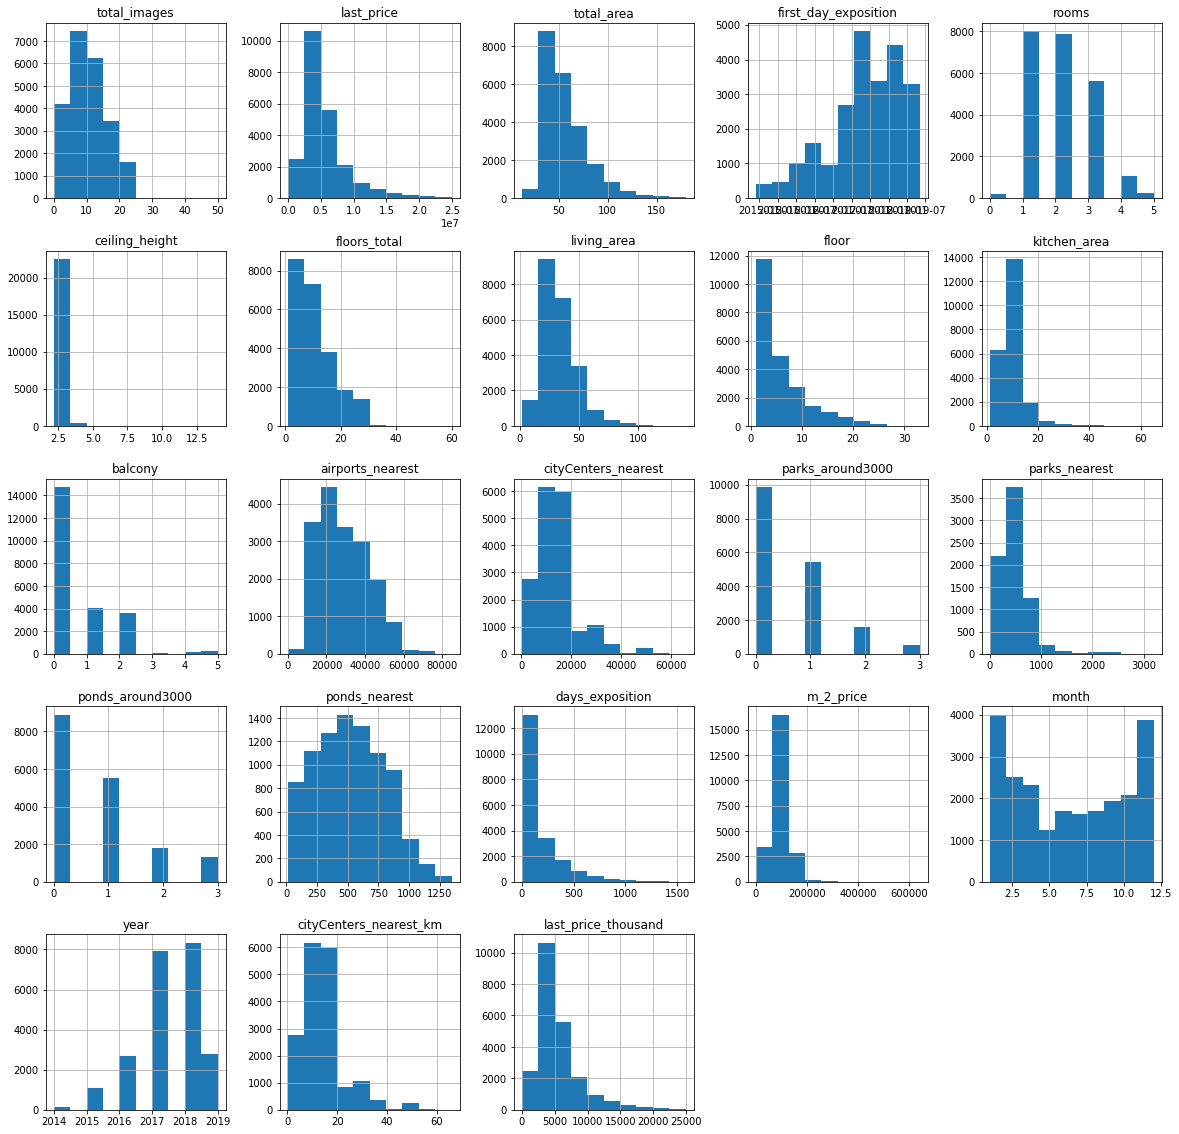

In [56]:
data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000').hist(figsize=(20, 20));

Найдем корреляцию между основными параметрами

Корреляция общей площадью квартиры и ее стоимости: 0.6537742094109014


<AxesSubplot:xlabel='total_area', ylabel='last_price_thousand'>

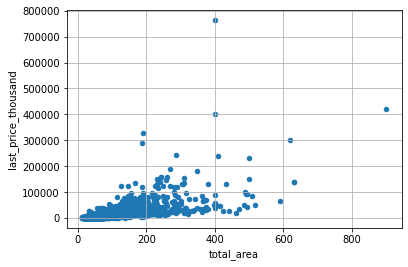

In [57]:
print('Корреляция общей площадью квартиры и ее стоимости:', data['total_area'].corr(data['last_price']))
data.plot(x='total_area', y='last_price_thousand', kind='scatter', grid=True)

немного изменим наш график для наглядности и уберем выбросы по квартирам площадью более 180 м и по цене больше 25 млн. В дальнейших расчетах будем фильтровать по тем же параметрам

<AxesSubplot:xlabel='total_area', ylabel='last_price_thousand'>

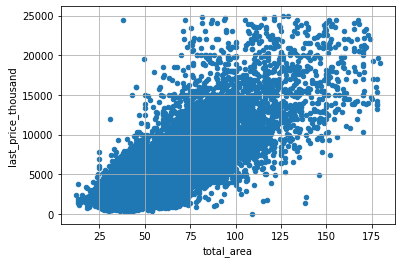

In [58]:
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .plot(x='total_area', y='last_price_thousand', kind='scatter', grid=True)
)

Теперь видно что присутствует линейная зависимость уровня цены и общей площади квартиры: чем ниже площадь тем ниже стоимость жилья. 

Корреляция площади кухни и стоимости квартиры: 0.4540733564707636


<AxesSubplot:xlabel='last_price_thousand', ylabel='kitchen_area'>

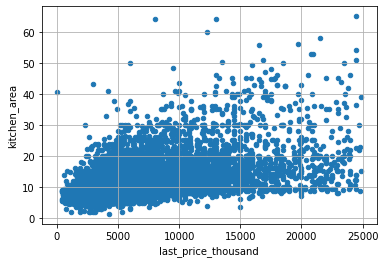

In [59]:
print('Корреляция площади кухни и стоимости квартиры:', data['kitchen_area'].corr(data['last_price_thousand']))
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .plot(x='last_price_thousand', y='kitchen_area', kind='scatter', grid=True)
)

зависимость прослеживается, но она скорее привязана к площади квартиры. как правило при увеличении площади жилья увеличивается и размер кухни. не думаю, что размер кухни в итоге влияет на цену квартиры

Корреляция жилой площади квартиры и стоимости квартиры: 0.5561860729663043


<AxesSubplot:xlabel='last_price_thousand', ylabel='living_area'>

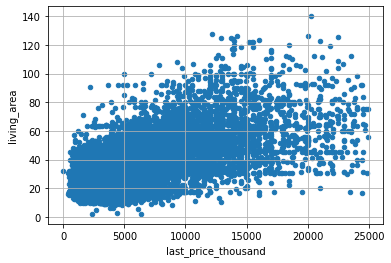

In [60]:
print('Корреляция жилой площади квартиры и стоимости квартиры:', data['living_area'].corr(data['last_price_thousand']))
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .plot(x='last_price_thousand', y='living_area', kind='scatter', grid=True)
)

логично здесь увидеть похожую зависимость как в предыдущих примерах, т.к. в итоге увеличение тех или иных помещений 
в квартире и является увеличением площади, а соответсвенно и цены

Корреляция количества комнат и стоимости квартиры: 0.36345267026811273


<AxesSubplot:xlabel='rooms', ylabel='last_price_thousand'>

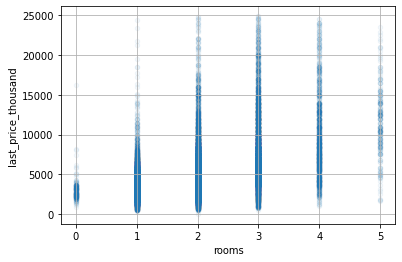

In [61]:
print('Корреляция количества комнат и стоимости квартиры:', data['rooms'].corr(data['last_price_thousand']))
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .plot(x='rooms', y='last_price_thousand', kind='scatter', grid=True, alpha=0.05)
)

рост цены прослеживается до 3х комнат, дальше наблюдается снижение и малое количество значений. Я бы предположила, 
что 4-5 комнатные квартиры не обязательно означают большую площадь, можно сделать перегородку и из 1 комнаты сделать две, 
но площадь больше не станет.
самое распространенное жилье имеет до 3 комнат включительно и на них работает правило увеличения стоимости. остальные квартиры,
за вычетом исключений (в виде действительно больших квартир с большими полноценными комнатами) этому правилу не поддаются

Зависимость типа этажа и стоимости квартиры:


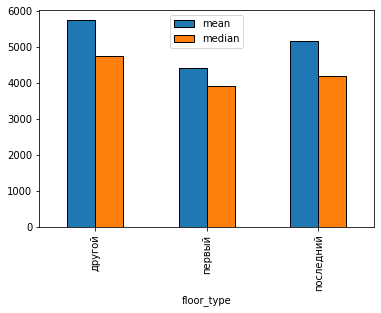

In [62]:
print('Зависимость типа этажа и стоимости квартиры:')
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .pivot_table(index='floor_type', values='last_price_thousand', aggfunc=('mean', 'median'))
    .plot.bar(ec='black')
);

квартиры на 1 и последнем этажах ниже в стоимости чем квартиры на других этажах, но между последним и другими этажами 
разница не критичная что по среднему значению, что по медиане.

Зависимость дня размещения и стоимости квартиры:


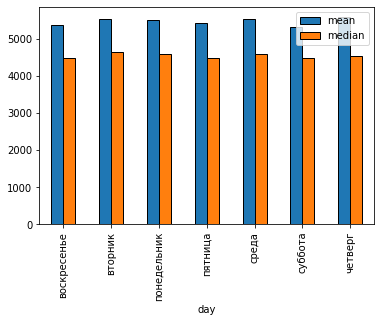

In [63]:
print('Зависимость дня размещения и стоимости квартиры:')
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .pivot_table(index='day', values='last_price_thousand', aggfunc=('mean', 'median'))
    .plot.bar(ec='black')
);

не выглядит так, будто день недели влияет на цену объекта

Зависимость месяца размещения и стоимости квартиры:


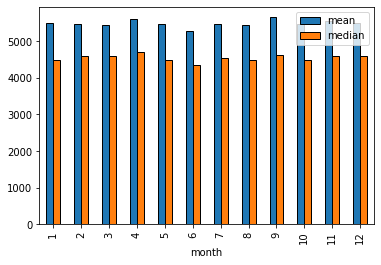

In [64]:
print('Зависимость месяца размещения и стоимости квартиры:')
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .pivot_table(index='month', values='last_price_thousand', aggfunc=('mean', 'median'))
    .plot.bar(ec='black')
);

можно уловить волнообразное движение: с января по март цена вырастала, потом до 6 месяца снижалась, и с 7-8 месяца наблюдается подъем и неброльшое снижение к новому году.

Зависимость года размещения и стоимости квартиры:


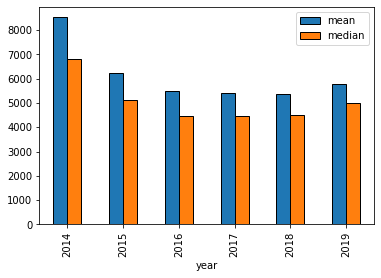

In [65]:
print('Зависимость года размещения и стоимости квартиры:')
(
    data.query('total_area <= 180 and rooms <=5 and last_price_thousand < 25000')
    .pivot_table(index='year', values='last_price_thousand', aggfunc=('mean', 'median'))
    .plot.bar(ec='black')
);

с 2014 до 2016 года цена на недвижимсоть снижалась, в период с 2016 по 2018 держалась приблизительно на одном уровне и в 2019 году начался рост

общий итог:
Исходя их вышеизложенных выводов и графиков я бы предположила, что на стоимость квартир сильнее всего влияет общая площадь
, но так же важен район и город, где она находится. Либо совокупность каких-либо факторов, таких как высота потолка, удаленность от центра, площадь и этаж.

посчитаем в каких населенных пунктак больше всего объявлений

In [66]:
data.groupby('locality_name')['total_area'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург    15716
Мурино               590
Кудрово              471
Шушары               440
Всеволожск           397
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               235
Name: total_area, dtype: int64

In [67]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_2_price,day,month,year,cityCenters_nearest_km,last_price_thousand,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,0,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,четверг,3,2019,16.03,13000.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,0,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,вторник,12,2018,18.60,3350.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,0,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,четверг,8,2015,13.93,5196.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,45.0,9,0,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,пятница,7,2015,6.80,64900.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,0,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,вторник,6,2018,8.10,10000.0,другой


In [68]:
price_stat = data.pivot_table(index='locality_name', values='m_2_price', aggfunc='mean')
adt_stat = data.pivot_table(index='locality_name', values='total_area', aggfunc='count')

final_stat = adt_stat.join(price_stat).sort_values(by = 'total_area', ascending=False)
display(final_stat.head(10))


,total_area,m_2_price
locality_name,,
Санкт-Петербург,15716,114819.346913
Мурино,590,86087.512017
Кудрово,471,95326.179108
Шушары,440,78677.364318
Всеволожск,397,68719.320378
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


In [69]:
top_10_data = final_stat.query('total_area >= 235')
display(top_10_data)

,total_area,m_2_price
locality_name,,
Санкт-Петербург,15716,114819.346913
Мурино,590,86087.512017
Кудрово,471,95326.179108
Шушары,440,78677.364318
Всеволожск,397,68719.320378
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


вывели топ 10 городов по количеству объявлений

,total_area,m_2_price
locality_name,,
Санкт-Петербург,15716,114819.3
Пушкин,369,103125.8
Кудрово,471,95326.2
Парголово,327,90175.9
Мурино,590,86087.5
Шушары,440,78677.4
Колпино,338,75424.6
Гатчина,307,68746.1
Всеволожск,397,68719.3


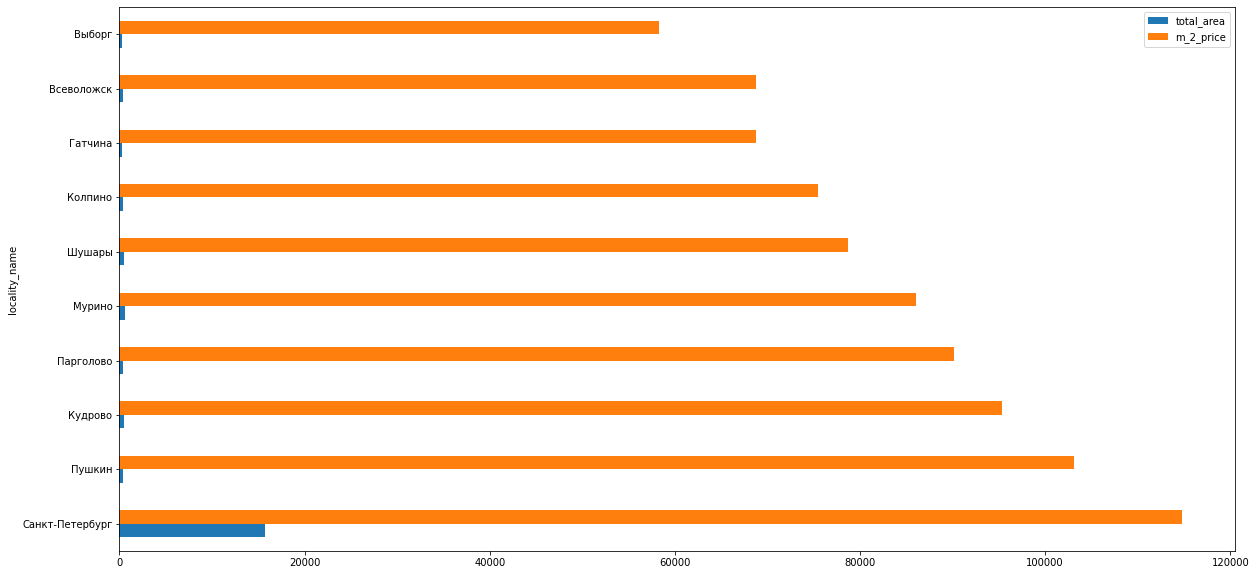

In [70]:
top_10_data.sort_values(by='m_2_price', ascending=False).plot(kind='barh', figsize=(20, 10));
display(top_10_data.sort_values(by='m_2_price', ascending=False).round(1))

Самое большое кличество объявлений и самый высокий ценник за квадратный метр в Санкт-Петербурге
Наименьшая стоимость квадратного метра и наименьшее количество объявлений в выборке топ-10 - в Выборге

Зависимость стоимости объекта от расстояния до центра города

In [71]:
#создадим переменную, в которой будут данные только по Санкт-Петербургу
spb_flats_data = data.query('locality_name == "Санкт-Петербург"')

In [72]:
spb_flats_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15716 entries, 0 to 23648
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            15716 non-null  int64         
 1   last_price              15716 non-null  float64       
 2   total_area              15716 non-null  float64       
 3   first_day_exposition    15716 non-null  datetime64[ns]
 4   rooms                   15716 non-null  int64         
 5   ceiling_height          15715 non-null  float64       
 6   floors_total            15716 non-null  int64         
 7   living_area             15716 non-null  float64       
 8   floor                   15716 non-null  int64         
 9   is_apartment            15716 non-null  object        
 10  studio                  15716 non-null  bool          
 11  open_plan               15716 non-null  bool          
 12  kitchen_area            15606 non-null  float6

In [73]:
#разобьем на диапазоны расстояния до центра
pd.qcut(spb_flats_data['cityCenters_nearest_km'], 5)

0        (15.5, 29.49]
2         (13.3, 15.5]
3        (6.56, 11.22]
4        (6.56, 11.22]
7        (11.22, 13.3]
             ...      
23640    (15.5, 29.49]
23641    (0.179, 6.56]
23642    (0.179, 6.56]
23645    (0.179, 6.56]
23648    (6.56, 11.22]
Name: cityCenters_nearest_km, Length: 15716, dtype: category
Categories (5, interval[float64]): [(0.179, 6.56] < (6.56, 11.22] < (11.22, 13.3] < (13.3, 15.5] < (15.5, 29.49]]

Посчитаем среднюю стоимость километра, разбив километраж на 5 категорий

In [74]:
list_1 = ['до 6,56 км','до 11,22 км', 'до 13,3 км', 'до 15,5 км', 'до 30 км']

spb_flats_data['km_category'] = pd.qcut(spb_flats_data['cityCenters_nearest_km'],
                                       q=[0, .2, .4, .6, .8, 1],
                                       labels=list_1)
total_km_category = spb_flats_data.groupby('km_category').agg({'cityCenters_nearest_km' : 'sum'})
total_km_category['last_price_thousand'] = spb_flats_data.groupby('km_category').agg({'last_price_thousand' : 'sum'}).round(1)
total_km_category['km_price'] = (total_km_category['last_price_thousand'] / total_km_category['cityCenters_nearest_km']).round(1)

display(total_km_category)


/tmp/ipykernel_608/973119747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats_data['km_category'] = pd.qcut(spb_flats_data['cityCenters_nearest_km'],


,cityCenters_nearest_km,last_price_thousand,km_price
km_category,,,
"до 6,56 км",13211.04,46779140.5,3540.9
"до 11,22 км",29306.70,25731746.4,878.0
"до 13,3 км",38479.25,18758416.3,487.5
"до 15,5 км",45152.90,18053299.6,399.8
до 30 км,55463.32,16430381.3,296.2


<AxesSubplot:xlabel='km_category'>

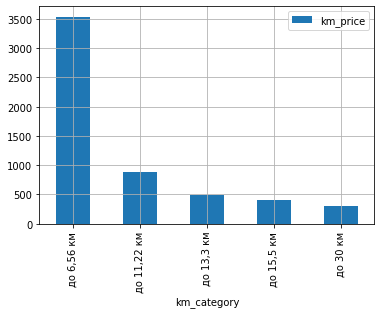

In [75]:
total_km_category.plot(y='km_price', kind='bar', grid=True)

Чем дальше от центра города - тем ниже стоимость одного км.

### Общий вывод

В этом проекте были исследованы следующие парметры:

    - общая площадь квартир: большая часть из них имеет площадь от 25 до 100 кв.м;
    
    - жилая площадь: много квартир с жилой площадью в районе 20 кв.м, так же достаточно большой пласт недвижимости в районе 28-60 жилых метров;
    
    - площадь кухни: преобладают кухни площадью от 5 до 15 кв.м;
    
    - цена объекта: основная масса квартир находится в ценовом диапазоне до 10 млн;
    
    - количество комнат: аибольшее количество предложений это 1-2 комнатные квартиры, немного меньше на рынке квартир 3х комнатных. Встречаются экземпляры с количеством комнат до 19, но скорее эксклюзив и таких значений лчень мало;
    
    - высота потолков: варьируется от 2,5 до 3,2. Преобладает высота потолков в районе 2,7 м;
    
    - этаж квартиры: наибольшее количество квартир находится до 10 этажа. Самое большое количество объявлений о продаже квартир на 2м этаже после 10го этажа количество объявлений идет на спад, все то, что выше 25 этажа можно считать эксклюзивными предложениями;
    
    - тип этажа квартиры (первый, последний, другой): Наименьшее количество квартир продается на 1м и последнем этажах. На рынке преобладают объявления с этажностью категории "другой";
    
    - общее количество этажей в доме: самые распространенные дома - 5 и 9 этажные;
    
    - расстояние до центра города: основная масса недвижимости находится в радиусе 18 км;
    
    - расстояние до аэропорта: варьируется от 10 до 55 км;
    
    - расстояние до парка: по имеющимся данным расстояние до ближайшего парка – в основном не больше, чем 750 м;
    
    - день публикации объявления: в будни количество объявлений размещается гораздо больше, чем в выходные дни;
    
    - месяц публикации объявления: летом и в новогодние праздники количество объявлений снижается. Пик публикаций приходится на начало года с февраля по апрель;
    
    - скорость продажи квартир: в основном квартиры продаются в течение первых 100 дней;
    
    - зависимость площади квартиры и ее стоимости: корреляция общей площади квартиры и ее стоимости равна 0.65, это говорит о прямой зависимости между двумя этими показателями;
    
    - зависимость жилой площади квартиры, площади кухни и стоимости недвижимости: корреляция 0,55 и 0,45 соответственно;
    
    - зависимость количества комнат и стоимости квартиры: корреляция 0,36, зависимость стремится к 0;
    
    - зависимость типа этажа и стоимости квартиры: квартиры на 1 и последнем этажах ниже в стоимости, чем квартиры на других этажах, но между последним и другими этажами разница не критичная;
    
    - зависимость дня размещения и стоимости квартиры: не прослеживается;
    
    - зависимость месяца размещения и стоимости квартиры: можно уловить волнообразное движение: с января по март цена вырастала, потом до 6 месяца снижалась, и с 7-8 месяца наблюдается подъем и неброльшое снижение к новому году;
    
    - зависимость года размещения и стоимости квартиры:с 2014 до 2016 года цена на недвижимсоть снижалась, в период с 2016 по 2018 держалась приблизительно на одном уровне и в 2019 году начался рост;
    
    - количество объявлений и цена за кв.м.: самое большое количество объявлений в Санкт-Петербурге (15 716 шт.), как и самая высокая стоимость за кв.м (114 819,30 руб), наименьшая стоимость квадратного метра (58 238.10 руб) и наименьшее количество объявлений (235 шт.) в топ-10 - в Выборге;
    
    - средняя стоимость 1 км по удалению от центра: чем дальше от центра - тем ниже средняя стоимость 1 км и соответственно ниже стоимость недвижимости.
    
Из вышеизложенного можно сделать вывод, что удаленность от центра города (имеется ввиду областной центр, в нашем случае это Санкт-Петербург), площадь квартиры (в том числе общая, жилая), этаж, на котором располагается квартира - имеют наибольшее влияние на ценообразование. Так же на этот параметр вляет "сезонность": в летние месяци и новый год цены на квариты ниже, чем в другое время. Думаю, это связано с праздниками и отпусками. 
День недели, когда было размещено объявление никак не влиет на цену квартиры, однако в будни публикуется гораздо больше объявлений, нежели в выходные.    
